In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Importing Dataset

1.   Since data is in form of excel file we have to use pandas read_excel to load the data.

1.   After loading it is important to check null values in a column or a row
2.   If it is present then following can be done,

*   Filling NaN values with mean, median and mode using fillna() method
*   If Less missing values, we can drop it as well


In [69]:
#getting train data set from excel
train = pd.read_excel('/content/drive/MyDrive/Flight fare prediction/Data/Data_Train.xlsx') 

In [70]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [71]:
#information about data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [72]:
#Shape of train dataset
train.shape

(10683, 11)

In [73]:
train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [74]:
#check if their is any null values
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [75]:
#found null values at 2 places so, we will drop(as these are in small numbers)
train.dropna(inplace=True)

In [76]:
#checking  again for null values
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [77]:
# find out single row has that problem(reduced 1 row)
train.shape

(10682, 11)

# Exploratory Data Analysis(EDA)

In [78]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## Data Cleaning

### Date_of_Journey feature





In [79]:
#model will not able to understand string value.So, converted to timestamp and then extract day and month of journey

#.dt.day method used to extract day of the date
#.dt.month method used to extract month of the date
# don't required year as data is for 1 year only(2019)

train['Journey_day'] = pd.to_datetime(train['Date_of_Journey'], format="%d/%m/%Y").dt.day
train['Journey_month'] = pd.to_datetime(train['Date_of_Journey'], format="%d/%m/%Y").dt.month


In [80]:
# Journey_day, Journey_month added to train data 
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [81]:
# So, now we have Journey_day and Journey_month now we can drop Date_of_Journey

train.drop(['Date_of_Journey'], axis=1, inplace = True)


In [82]:
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


### Departure Time feature

In [83]:
# Depature Time

# Extract Hours from Dep_Time
train['Dep_hour'] = pd.to_datetime(train['Dep_Time']).dt.hour

#Extract Minutes from Dep_Time
train['Dep_min'] = pd.to_datetime(train['Dep_Time']).dt.minute

#drop Dep_Time, as it of no use
train.drop(['Dep_Time'], axis=1, inplace=True) 


In [84]:
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


### Arrival Time feature

In [85]:
# Arrival Time

# Extract Hours from Arrival_Time
train['Arrival_hour'] = pd.to_datetime(train['Arrival_Time']).dt.hour

#Extract Minutes from Arrival_Time
train['Arrival_min'] = pd.to_datetime(train['Arrival_Time']).dt.minute

#drop Arrival_Time, as it of no use
train.drop(['Arrival_Time'], axis=1, inplace=True) 

In [86]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


### Duration feature


*   Adding 0h which has only mintues and 0m which has only hours
*   Extracting Hour (h) and minutes (m) from duration



In [87]:
# Duration  - Difference between Departure time and Arrival time

duration = list(train['Duration'])

# making duration in one format which contain both h(hr) and m(min)
# whichever data contain only hr or only min based on that hr and min added
for i in range(len(duration)):
    #which contain only hour or mins
    if len(duration[i].split()) != 2: 
      if 'h' in duration[i]:
        duration[i] = duration[i] + ' 0m'
      else:
        duration[i] ='0h ' + duration[i]

duration_hr = []
duration_min =[]
for i in range(len(duration)):
  #extract hours from duration
  duration_hr.append(int(duration[i].split(sep='h')[0]))
  #extract minutes from duration
  duration_min.append(int(duration[i].split(sep='m')[0].split()[-1]))
  

In [88]:
# adding hr and min list to train dataframe
train['Duration_hours'] = duration_hr
train['Duration_mins'] = duration_min

#drop Duration column
train.drop(['Duration'], axis=1,inplace = True)

In [89]:
#check Duration_hours and Duration_mins columns added and Duration column is dropped
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorical Data

*   Nominal data : data not in order(One Hot Encoding used)
*   Ordinal data :  data in order(Label Encoding)-(when we can do comparison like domestic, international way)



In [90]:
train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

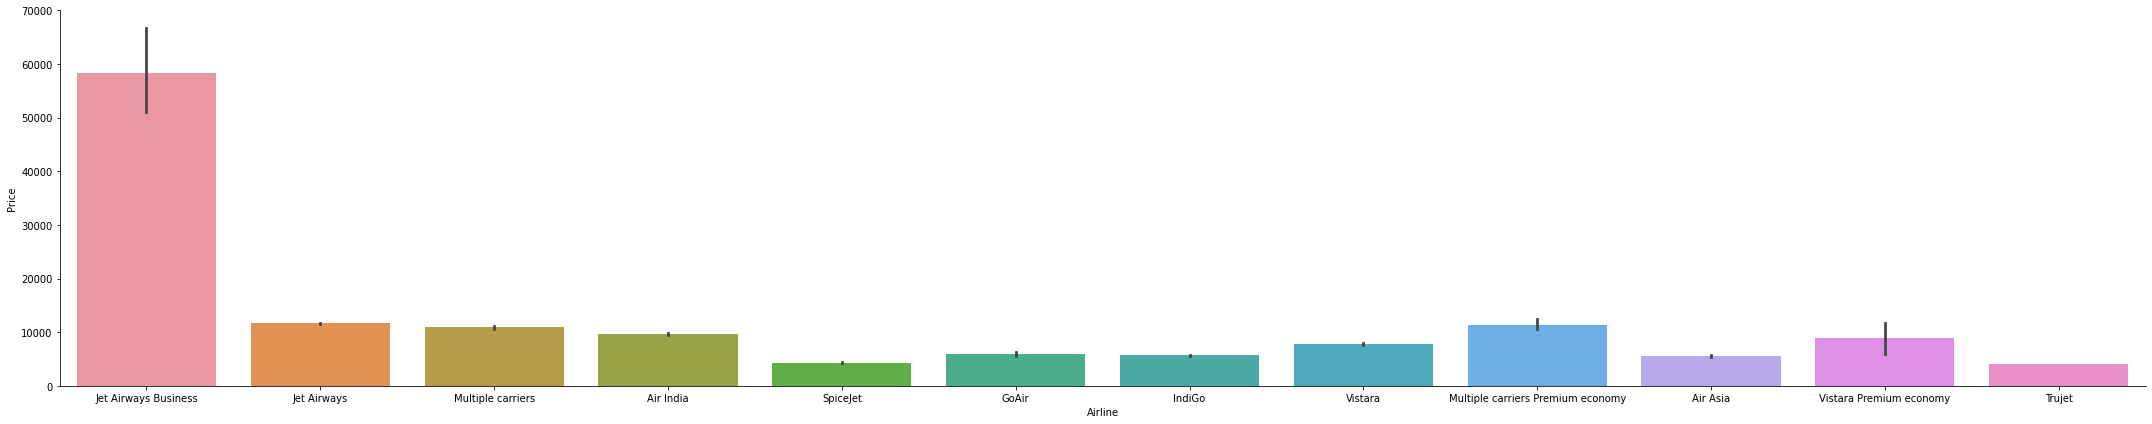

In [91]:
# plotting categorical plot between Airline and Price
# sns.set()
sns.catplot(y='Price', x='Airline', data=train.sort_values('Price', ascending=False),kind ='bar', height =6,aspect =5 )

Observation

*   From graph we can see that Jet Airways Business have the highest Price.




### Airline Feature

In [92]:
# As airline is nominal categorical data because we cannot compare airlines which oneis best(performing One hot encoding)

#drop_first=True (To avoid dummy variable trap-occurs when two or more dummy variables created by one-hot encoding are highly correlated)
# last variable can be found using remaing variables
Airline = train[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


### Source feature

In [93]:
#Source
train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

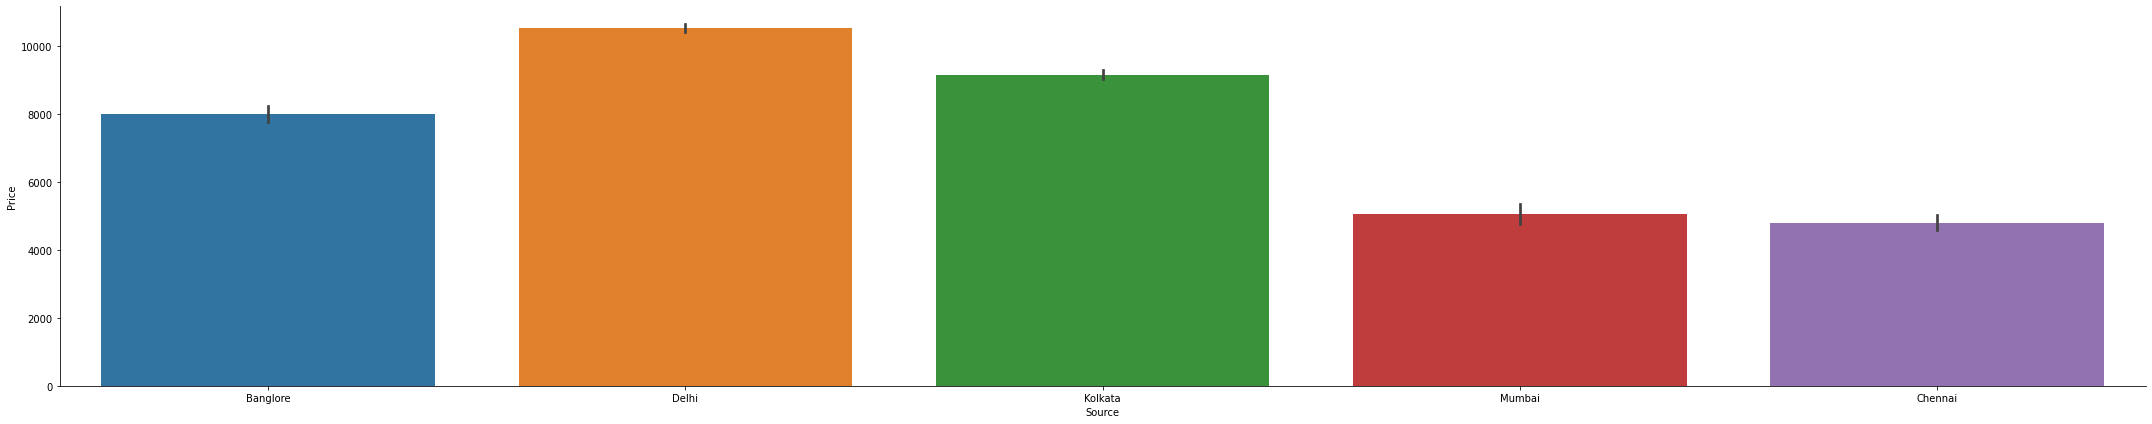

In [94]:
# Source vs Price

sns.catplot(y='Price', x='Source', data=train.sort_values('Price', ascending=False),kind ='bar', height =6,aspect =5 )


Observation

*   Flights from delhi are more costly as compare to other source locations.




In [95]:
# As source is nominal categorical data (performing One hot encoding)

Source = train[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


### Destination Feature

In [96]:
#Destination
train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [97]:
# As source is nominal categorical data (performing One hot encoding)

Destination = train[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


### Route feature and Additional info feature

In [98]:
# Route
train["Route"].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [ ]:
#train["Route"].unique().tolist()


In [99]:
#splitting route into separate columns

train['Route1']= train['Route'].str.split('→').str[0]
train['Route2']= train['Route'].str.split('→').str[1]
train['Route3']= train['Route'].str.split('→').str[2]
train['Route4']= train['Route'].str.split('→').str[3]
train['Route5']= train['Route'].str.split('→').str[4]

In [101]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45,BLR,NAG,DEL,NaN,NaN


In [102]:
#checking for null values
train.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  0
Total_Stops            0
Additional_Info        0
Price                  0
Journey_day            0
Journey_month          0
Dep_hour               0
Dep_min                0
Arrival_hour           0
Arrival_min            0
Duration_hours         0
Duration_mins          0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [103]:
# filling None value where we have null values
for i in ['Route3','Route4','Route5']:
  train[i].fillna('None',  inplace= True)

In [104]:
train.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
Journey_day        0
Journey_month      0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
Duration_hours     0
Duration_mins      0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [106]:
#Applying label encoding -converting to numerical form
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in ['Route1','Route2','Route3','Route4','Route5']:
  train[i] = encoder.fit_transform(train[i])

In [107]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45,0,34,8,13,5


In [108]:
train["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [109]:
# we can drop Route column and Additional_Info
# Aditional info column almost 80% has no_info - so it is of no use
# Route columnis similar to Total_stops column

train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [110]:
train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [111]:
# As Total_Stops is of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [112]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,34,8,13,5


In [113]:
# Concatenate remaining dataframe with train data (Airline + Source + Destination)

final_train_data = pd.concat([train,Airline,Source,Destination], axis=1)

# drop Airline,Source,Destination
final_train_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [114]:
final_train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [115]:
# 35  features
# 10682 data points
final_train_data.shape

(10682, 35)

In [116]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,34,8,13,5


## Checking for Outliers

In [123]:
def plot(data,column):
    # unpacking multiple axis
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[column],ax=ax1)
    sns.boxplot(data[column],ax=ax2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


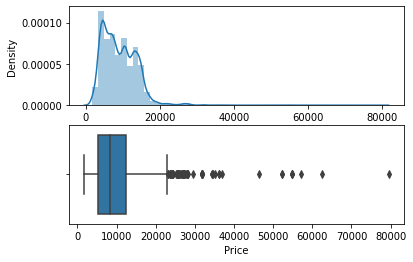

In [124]:
plot(final_train_data,'Price')

Observation

*   As we can see their is an outlier in price feature.
*   So, we will take a median from certain point(price - 40,000) and replace them



In [125]:
final_train_data['Price']=np.where(final_train_data['Price']>=40000,final_train_data['Price'].median(),final_train_data['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


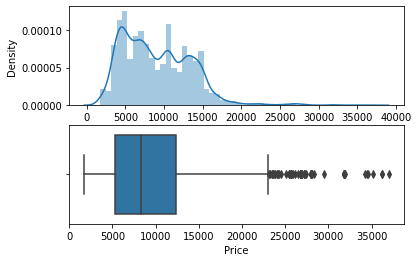

In [126]:
plot(final_train_data,'Price')

In [127]:
# forming data -> X: Independent Feature, Y: Dependent Feature
y=final_train_data['Price']
X=final_train_data.drop('Price',axis=1)


## Feature Selection

We will find the best features which will be higly co-related with target variable. Following method we can use for feature selection:


1.   Heat Map
2.   Feature importanace







In [128]:
final_train_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [129]:
# # .loc used to access group of rows and columns variable
# # get all independent features
# X = final_train_data.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
#        'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
#        'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
#        'Airline_Jet Airways', 'Airline_Jet Airways Business',
#        'Airline_Multiple carriers',
#        'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
#        'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
#        'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
#        'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
#        'Destination_Kolkata', 'Destination_New Delhi']]
# X.head()

In [130]:
# # get dependent feature price
# y= final_train_data.iloc[:,1]
# y.head()

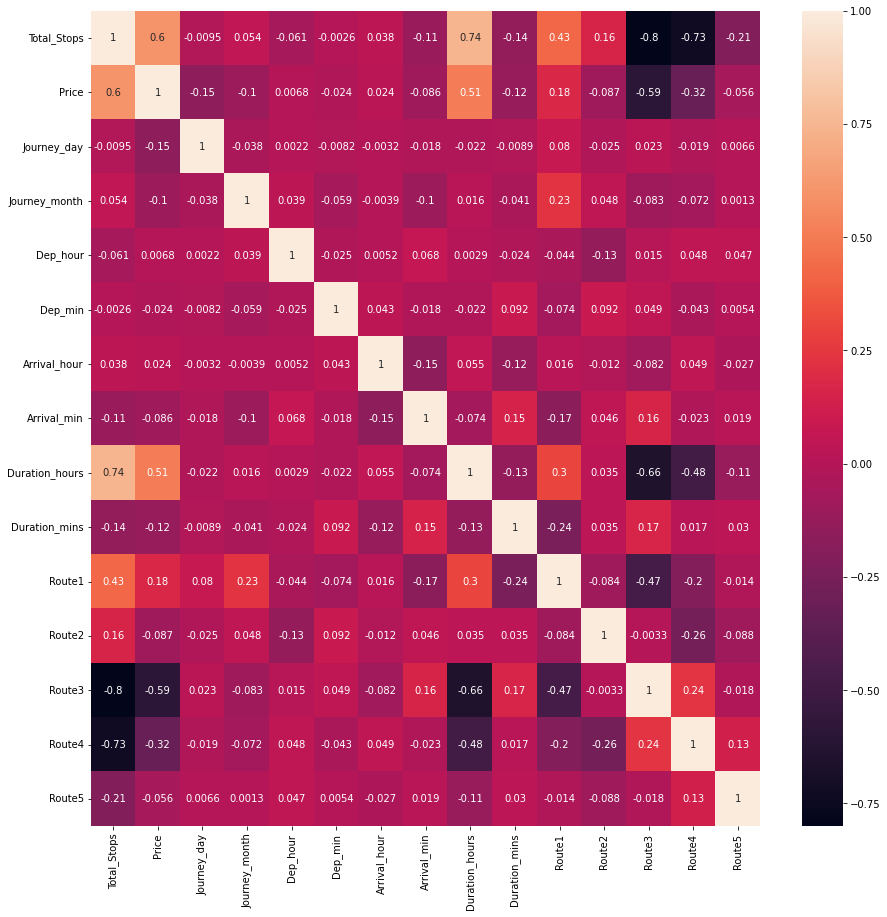

In [131]:
# find correlation between independent and dependent variables using heat maps

plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), annot= True )
plt.show()


Observation


*   Price is correlated with Total_stops
*   total_stops somewhat high correlated with duration_hours

*   No features are highly corelated(around 0.80 or more), if it has we would have removed one of the features

*   As we should have less correlaton between independent variables and highly correlated with dependent variables









In [175]:
# Extract Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [176]:
print(selection.feature_importances_)

[1.74762932e-01 1.55127715e-01 5.96875039e-02 1.87666376e-02
 1.82437674e-02 1.72085844e-02 1.42751557e-02 6.22914661e-02
 1.25815628e-02 1.01065188e-02 2.32513585e-02 2.15510489e-01
 2.06592386e-02 5.73725698e-04 8.41631344e-03 1.30641246e-03
 1.76374502e-02 1.03026949e-01 3.57753677e-04 2.66883399e-02
 9.57234406e-04 2.27747163e-03 1.40336130e-04 6.02755497e-03
 1.00769278e-04 5.11381763e-04 1.90926054e-03 1.87709044e-03
 4.15498280e-03 1.89392305e-03 4.81293276e-04 3.30554402e-03
 4.08077827e-04 1.54752066e-02]


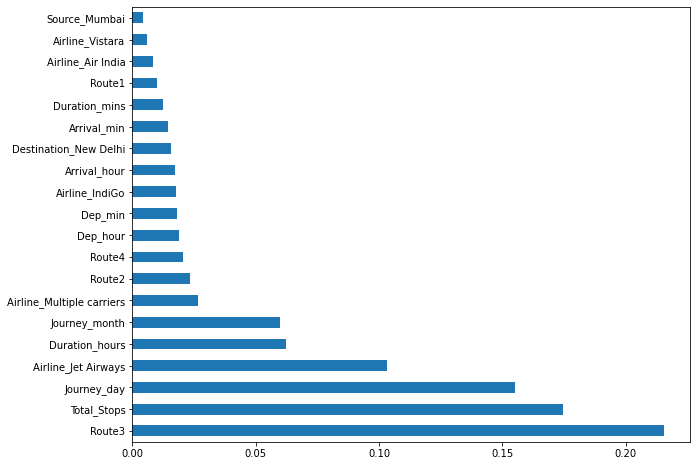

In [177]:
# plot graph of feature importance

plt.figure(figsize=(10,8))
feature_importance = pd.Series(selection.feature_importances_, index=X.columns)
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

##Model Fitting

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [179]:
X_train.shape

(8545, 34)

In [180]:
X_test.shape

(2137, 34)

### Random Forest

In [184]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor_rf = RandomForestRegressor()
regressor_rf.fit(X_train, y_train)
y_predict = regressor_rf.predict(X_test)
train_score = regressor_rf.score(X_train, y_train)
test_score = regressor_rf.score(X_test, y_test)

#r2 score based
print('train r2_score',train_score )
print('test r2_score',test_score )

train r2_score 0.951571508098009
test r2_score 0.8358070732214471


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


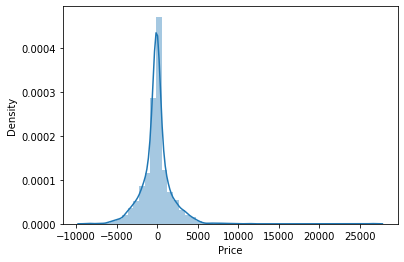

In [185]:
# plotting our predict , which form gaussian distribution means model performing good
sns.distplot(y_test - y_predict)
plt.show()


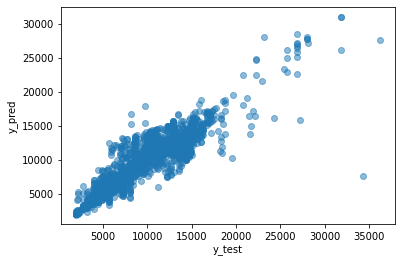

In [186]:
# scatter plot - which is also in increasing order
plt.scatter(y_test, y_predict, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [189]:
#Performance metrics

from sklearn import metrics
# print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
# print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('MAPE:',np.mean(np.abs((y_predict - y_test) / y_test))*100)


RMSE: 1833.7485004614273
MAPE: 12.629103049082147


## Hyperparameter Tuning

In [190]:
from sklearn.model_selection import RandomizedSearchCV

In [191]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


# Create the random grid

random_forest_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [192]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
random_rf = RandomizedSearchCV(estimator = regressor_rf, param_distributions = random_forest_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs=-1)
random_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [193]:
random_rf.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [194]:
rf_predict = random_rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


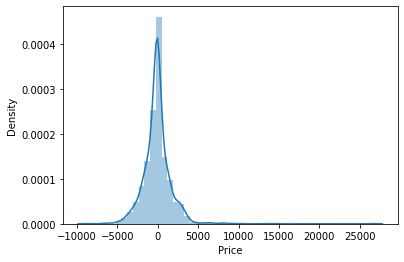

In [195]:
#plot
sns.distplot(y_test - rf_predict)
plt.show()

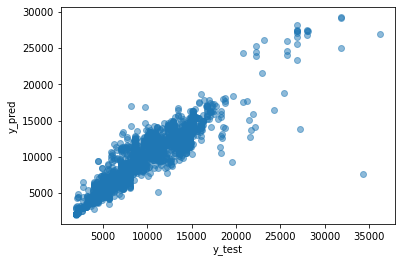

In [196]:
# scatter plot - which is also in increasing order
plt.scatter(y_test, rf_predict, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [197]:
#Performance metrics

# print('MAE:', metrics.mean_absolute_error(y_test, rf_predict))
# print('MSE:', metrics.mean_squared_error(y_test, rf_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_predict)))
print('MAPE:',np.mean(np.abs((rf_predict - y_test) / y_test))*100)

RMSE: 1739.7065509978875
MAPE: 12.506344448780006


## Save model

In [198]:
import pickle
# open a file, where you want to store the data
filepath = '/content/drive/MyDrive/Flight fare prediction/pickle/random_forest.pkl'

# dump information to that file
pickle.dump(random_rf, open(filepath, 'wb'))

In [199]:
forest = pickle.load(open("/content/drive/MyDrive/Flight fare prediction/pickle/random_forest.pkl",'rb'))


In [200]:
y_pred = forest.predict(X_test)

In [201]:
metrics.r2_score(y_test, y_pred)

0.8522161764819756